In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Implementing Thompson Sampling

In [35]:
N = len(df) # we can adjust this
d = len(df.columns)

print(N, d)

10000 10


In [33]:
import random

ads_selected = []

number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_random = 0
    
    for i in range(0, d):
        random_beta = random.betavariate(number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1)
        
        if (random_beta > max_random):
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = df.values[n, ad]
    if reward == 1:
            number_of_rewards_1[ad] = number_of_rewards_1[ad] + 1
    else:
        number_of_rewards_0[ad] =  number_of_rewards_0[ad] + 1
        total_reward = total_reward + reward

## Visualising the results

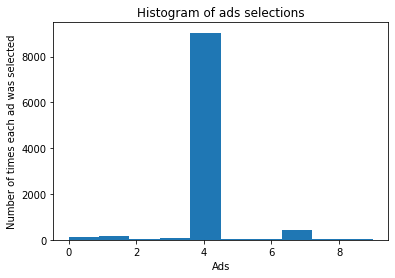

In [34]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

From our UCB method, we were able to identify that ad 4 was the best option in 5,000 rounds. Using Thompson we can easily see this in 1000 rounds which concludes that Thompson works far quicker than UCB.